In [1]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:15 http://se

In [2]:
import pandas as pd
import re
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np

okt = Okt()

In [3]:
# 
from google.colab import files
myfile = files.upload()

Saving 네이버시리즈영화정보_청불포함.csv to 네이버시리즈영화정보_청불포함.csv


In [4]:
# 
data = pd.read_csv('/content/네이버시리즈영화정보_청불포함.csv',
                   encoding='utf-8')
data.head()

,Unnamed: 0,제목,본문
0,0,까불지마,벽돌과 개떡 그들은 한 때 잘나가던 동방파의 서열 23위를 다투는 사이 삼복은 그들...
1,1,엘리트,어두운 학원 교실 조기교육을 받고 있는 아이들이 시험 문제를 풀고 있다 시험이 끝났...
2,2,밀정 1930,동양의 파리로 알려진 화려한 1930년대 상해 그러나 화려한 노래와 춤의 이면에는 ...
3,3,엠티맨,첫날 밤 그의 소리가 들리고 둘째 날 밤 그의 모습이 보이고 셋째 날 밤 그가 너를...
4,5,바이크 원정대 인 이탈리아,이탈리아 남부 살레르노를 중심으로바이커들의 로망 이탈리아를 달린다해외여행에 대한 설...


In [5]:
# drop_duplicates(): 
data = data.drop_duplicates(['제목'])
data.head()

,Unnamed: 0,제목,본문
0,0,까불지마,벽돌과 개떡 그들은 한 때 잘나가던 동방파의 서열 23위를 다투는 사이 삼복은 그들...
1,1,엘리트,어두운 학원 교실 조기교육을 받고 있는 아이들이 시험 문제를 풀고 있다 시험이 끝났...
2,2,밀정 1930,동양의 파리로 알려진 화려한 1930년대 상해 그러나 화려한 노래와 춤의 이면에는 ...
3,3,엠티맨,첫날 밤 그의 소리가 들리고 둘째 날 밤 그의 모습이 보이고 셋째 날 밤 그가 너를...
4,5,바이크 원정대 인 이탈리아,이탈리아 남부 살레르노를 중심으로바이커들의 로망 이탈리아를 달린다해외여행에 대한 설...


In [6]:
# isnull(): 
data['본문'].isnull().sum()

6

In [7]:
# fillna():
data['본문'] = data['본문'].fillna('')

In [8]:
data['본문'].isnull().sum()

0

In [9]:
myfile = files.upload()

Saving korean_stopword.csv to korean_stopword.csv


In [10]:
#pd.read_csv로 csv파일 불러오기
k_stopword = pd.read_csv('/content/korean_stopword.csv')
# list(): 
stopword = list(k_stopword['불용어'])
stopword[:5]

['이', '있', '하', '것', '들']

In [13]:
stopword = stopword + ['은','를','이가']

In [12]:
# del df: 
# del df['a']: 
del data['Unnamed: 0']
data.head()

,제목,본문,morphs
0,까불지마,벽돌과 개떡 그들은 한 때 잘나가던 동방파의 서열 23위를 다투는 사이 삼복은 그들...,벽돌 과 개떡 은 잘나가던 동방 파의 서열 23 위 를 다투는 사이 삼복 은 의 ...
1,엘리트,어두운 학원 교실 조기교육을 받고 있는 아이들이 시험 문제를 풀고 있다 시험이 끝났...,어 두운 학원 교실 조기교육 을 받고 있는 아이 시험 를 풀 있다 시험 끝났다는 ...
2,밀정 1930,동양의 파리로 알려진 화려한 1930년대 상해 그러나 화려한 노래와 춤의 이면에는 ...,동양 의 파리 알려진 화려한 1930년 대 상해 화려한 노래 춤 의 이면 에는 일...
3,엠티맨,첫날 밤 그의 소리가 들리고 둘째 날 밤 그의 모습이 보이고 셋째 날 밤 그가 너를...,첫날 밤 의 들리고 둘째 날 밤 의 모습 셋째 날 밤 너 를 찾아가리라 10 대 ...
4,바이크 원정대 인 이탈리아,이탈리아 남부 살레르노를 중심으로바이커들의 로망 이탈리아를 달린다해외여행에 대한 설...,이탈리아 남부 살레르노 를 중심 으로 바이 커 들의 로망 이탈리아 를 달린다 해외...


In [11]:
morphs_lst = []
for i in data.index:
    morphs = ""
    # morphs(): 
    # data.loc[i]: 
    morph = okt.morphs(data.loc[i]['본문'])
    # 
    for txt in morph:
      # 
      if txt not in stopword:
        # 
        morphs = morphs + " " + txt
    # morphs: 
    morphs_lst.append(morphs)
# 
data['morphs'] = morphs_lst
data.head()

,Unnamed: 0,제목,본문,morphs
0,0,까불지마,벽돌과 개떡 그들은 한 때 잘나가던 동방파의 서열 23위를 다투는 사이 삼복은 그들...,벽돌 과 개떡 은 잘나가던 동방 파의 서열 23 위 를 다투는 사이 삼복 은 의 ...
1,1,엘리트,어두운 학원 교실 조기교육을 받고 있는 아이들이 시험 문제를 풀고 있다 시험이 끝났...,어 두운 학원 교실 조기교육 을 받고 있는 아이 시험 를 풀 있다 시험 끝났다는 ...
2,2,밀정 1930,동양의 파리로 알려진 화려한 1930년대 상해 그러나 화려한 노래와 춤의 이면에는 ...,동양 의 파리 알려진 화려한 1930년 대 상해 화려한 노래 춤 의 이면 에는 일...
3,3,엠티맨,첫날 밤 그의 소리가 들리고 둘째 날 밤 그의 모습이 보이고 셋째 날 밤 그가 너를...,첫날 밤 의 들리고 둘째 날 밤 의 모습 셋째 날 밤 너 를 찾아가리라 10 대 ...
4,5,바이크 원정대 인 이탈리아,이탈리아 남부 살레르노를 중심으로바이커들의 로망 이탈리아를 달린다해외여행에 대한 설...,이탈리아 남부 살레르노 를 중심 으로 바이 커 들의 로망 이탈리아 를 달린다 해외...


### TF-IDF(단어 빈도-역 문서 빈도)
TF-IDF는 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법   

__(1) tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수.   
(2) df(t) : 특정 단어 t가 등장한 문서의 수.   
(3) idf(d, t) : df(t)에 반비례하는 수.__   
> idf(d, t) = log(n/1+df(t))
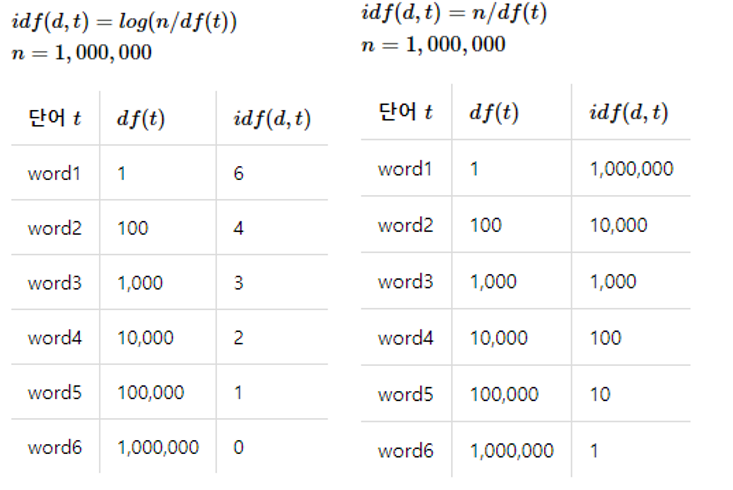   
- 불용어 등과 같이 자주 쓰이는 단어들은 비교적 자주 쓰이지 않는 단어들보다 최소 수십 배 자주 등장하기 때문에 log를 씌워주지 않으면, 희귀 단어들에 엄청난 가중치가 부여 된다. 
- log 안의 식에서 분모에 1을 더해주는 이유는 첫번째 이유로는 특정 단어가 전체 문서에서 등장하지 않을 경우에 분모가 0이 되는 상황을 방지

※ 상용로그표: https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=junhyuk7272&logNo=221264644231  
※ 로그계산기: https://soharang.tistory.com/707

###  문서에서의 각 단어의 TF

문서1 : 먹고 싶은 사과   
문서2 : 먹고 싶은 바나나   
문서3 : 길고 노란 바나나 바나나   
문서4 : 저는 과일이 좋아요  

In [ ]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))

In [ ]:
vocab

['과일이', '사과', '먹고', '좋아요', '바나나', '노란', '싶은', '길고', '저는']


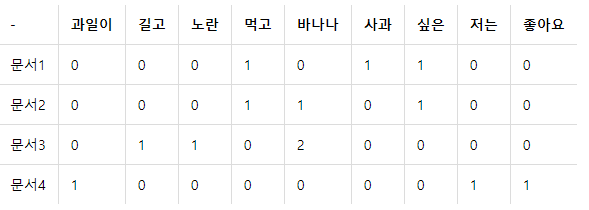

In [ ]:
N = len(docs) # 총 문서의 수

def tf(t, d):
    return d.count(t)

In [ ]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))

In [ ]:
tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,사과,먹고,좋아요,바나나,노란,싶은,길고,저는
0,0,1,1,0,0,0,1,0,0
1,0,0,1,0,1,0,1,0,0
2,0,0,0,0,2,1,0,1,0
3,1,0,0,1,0,0,0,0,1


#### IDF 계산
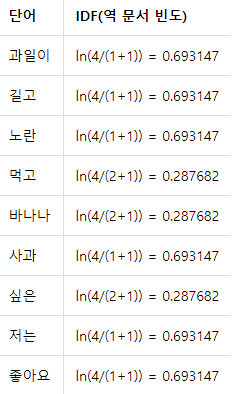

In [ ]:
def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

In [ ]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
과일이,0.693147
사과,0.693147
먹고,0.287682
좋아요,0.693147
바나나,0.287682
노란,0.693147
싶은,0.287682
길고,0.693147
저는,0.693147


#### TF-IDF를 계산
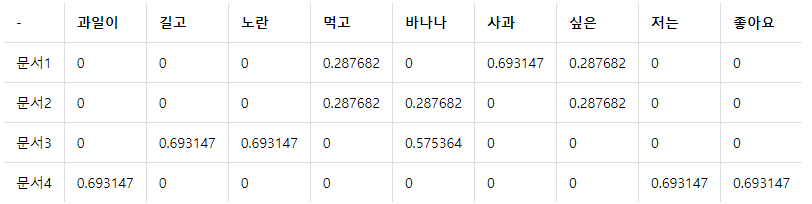

In [ ]:
def tfidf(t, d):
    return tf(t,d)* idf(t)

In [ ]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,사과,먹고,좋아요,바나나,노란,싶은,길고,저는
0,0.000000,0.693147,0.287682,0.000000,0.000000,0.000000,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.287682,0.000000,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.575364,0.693147,0.000000,0.693147,0.000000
3,0.693147,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.693147


#### 사이킷 런

In [14]:
# tf-idf: https://wikidocs.net/31698
tfidf = TfidfVectorizer()
# morphs 열에 대해서 tf-idf를 수행
tfidf_matrix = tfidf.fit_transform(data['morphs'])
print(tfidf_matrix.shape)

(16201, 65770)


16,201개의 영화를 표현하기위해 총 65,770개의 단어가 사용되었음을 보임.

### 코사인 유사도
- 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미   
- 두 벡터의 방향이 완전히 동일한 경우는 1   
- 90°의 각을 이루면 0   
- 180°로 반대의 방향을 가지면 -1  
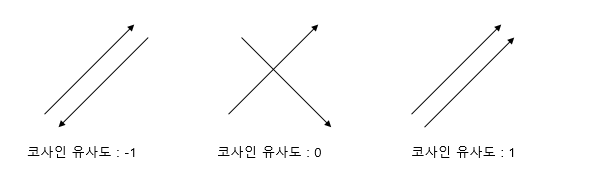

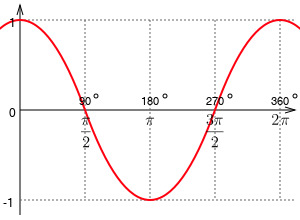  
__θ를 두 벡터 간의 사잇각이라고 했을 때__    
- θ=0이면, cosθ = 1이되고 두 벡터는 완전히 동일한 벡터.     
- θ=90도이면, cosθ = 0이되고 두 벡터는 상관 관계가 없다.
- θ=180도이면, cosθ = -1이되고 두 벡터는 완전히 반대.

문서 단어 행렬이나 TF-IDF 행렬을 통해서 문서의 유사도를 구하는 경우에는 문서 단어 행렬이나 TF-IDF 행렬이 각각의 특징 벡터 A, B가 된다.

In [15]:
# 코사인 유사도: https://wikidocs.net/24603
# 코사인 유사도를 사용하면 바로 문서의 ( )를 구한다.
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.00494185, 0.0121967 , ..., 0.00808412, 0.00538158,
        0.01404287],
       [0.00494185, 1.        , 0.0055478 , ..., 0.0069272 , 0.02119022,
        0.00563172],
       [0.0121967 , 0.0055478 , 1.        , ..., 0.00923746, 0.01098523,
        0.00603291],
       ...,
       [0.00808412, 0.0069272 , 0.00923746, ..., 1.        , 0.00703183,
        0.00123542],
       [0.00538158, 0.02119022, 0.01098523, ..., 0.00703183, 1.        ,
        0.00734759],
       [0.01404287, 0.00563172, 0.00603291, ..., 0.00123542, 0.00734759,
        1.        ]])

In [16]:
cosine_sim.shape

(16201, 16201)

In [17]:
indices = pd.Series(data.index, index=data['제목']).drop_duplicates()
print(indices.head())

제목
까불지마              0
엘리트               1
밀정 1930           2
엠티맨               3
바이크 원정대 인 이탈리아    4
dtype: int64


In [18]:
idx = indices['원더 우먼 1984']
print(idx)

27


In [19]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # 
    idx = indices[title]

    #
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 
    sim_scores = sim_scores[1:6]

    # 
    movie_indices = []
    for i in sim_scores:
      movie_indices.append(i[0])

    # 
    return data['제목'].iloc[movie_indices]

In [20]:
get_recommendations('조제')

114                   조제
9762                 이퀄스
12976    조제 호랑이 그리고 물고기들
14189         라이 위드 미감독판
16037                교차로
Name: 제목, dtype: object

In [21]:
get_recommendations('밀정 1930')

9898         분노의 주먹
5036        600 결사대
4020           상해전기
1423            천여지
6017    야인시대 전쟁의 서막
Name: 제목, dtype: object